In [1]:
import GCRCatalogs
import esutil
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.table import Table

In [2]:
f = h5py.File('/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/agn_mean_mags.h5', 'r')
nagn = f['blackHoleEddingtonRatio'].size
agn = np.zeros(nagn, dtype=[('blackHoleEddingtonRatio', 'f4'),
                          ('blackHoleMass', 'f4'),
                          ('galaxy_id', 'i8'),
                          ('mag_g_lsst_agn', 'f4'),
                          ('mag_r_lsst_agn', 'f4'),
                          ('mag_i_lsst_agn', 'f4')])
agn['blackHoleEddingtonRatio'][:] = np.array(f['blackHoleEddingtonRatio'])
agn['blackHoleMass'][:] = np.array(f['blackHoleMass'])
agn['galaxy_id'][:] = np.array(f['galaxy_id'])
agn['mag_g_lsst_agn'][:] = np.array(f['mag_g_lsst(agn)'])
agn['mag_r_lsst_agn'][:] = np.array(f['mag_r_lsst(agn)'])
agn['mag_i_lsst_agn'][:] = np.array(f['mag_i_lsst(agn)'])

In [3]:
truthcat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')
quantities_wanted = ['galaxy_id',
                     'ra', 'dec', 'redshift', 
                     'mag_true_g_lsst', 'mag_true_r_lsst', 'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_y_lsst',
                     'Mag_true_g_lsst_z0', 'Mag_true_r_lsst_z0',
                     'halo_id', 'halo_mass', 'is_central', 'stellar_mass_bulge']
query = GCRCatalogs.GCRQuery('(mag_true_z_lsst < 24.0) & (is_central == True) & (halo_mass > 5e11) & (redshift < 1.0)')
centraldata = truthcat.get_quantities(quantities_wanted, [query])

In [4]:
centraldata = Table(centraldata)

In [5]:
a, b = esutil.numpy_util.match(centraldata['galaxy_id'], agn['galaxy_id'])

Text(0.5, 1.0, 'Centrals, z<1.0, Halo Mass > 5e11')

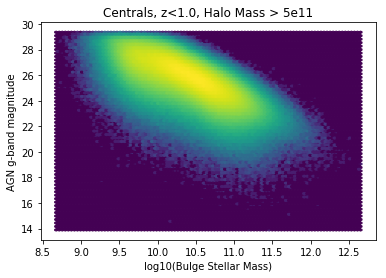

In [8]:
plt.hexbin(np.log10(centraldata['stellar_mass_bulge'][a]), agn['mag_g_lsst_agn'][b], bins='log')
plt.xlabel('log10(Bulge Stellar Mass)')
plt.ylabel('AGN g-band magnitude')
plt.title('Centrals, z<1.0, Halo Mass > 5e11')

In [9]:
g_tot = -2.5 * np.log10(10.**(centraldata['mag_true_g_lsst'][a]/-2.5) + 10.**(agn['mag_g_lsst_agn'][b]/-2.5))
r_tot = -2.5 * np.log10(10.**(centraldata['mag_true_r_lsst'][a]/-2.5) + 10.**(agn['mag_r_lsst_agn'][b]/-2.5))
i_tot = -2.5 * np.log10(10.**(centraldata['mag_true_i_lsst'][a]/-2.5) + 10.**(agn['mag_i_lsst_agn'][b]/-2.5))

In [10]:
use, = np.where((centraldata['mag_true_g_lsst'][a] - g_tot) > 0.05)
print(use.size)

2807150


Text(0.5, 1.0, 'Centrals, z<1.0, Halo Mass > 5e11')

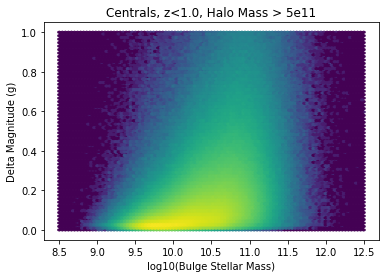

In [12]:
plt.hexbin(np.log10(centraldata['stellar_mass_bulge'][a]), centraldata['mag_true_g_lsst'][a] - g_tot, bins='log',
           extent=[8.5, 12.5, 0.0, 1.0])
plt.xlabel('log10(Bulge Stellar Mass)')
plt.ylabel('Delta Magnitude (g)')
plt.title('Centrals, z<1.0, Halo Mass > 5e11')

In [33]:
# what percentage of bulge mass > 10**10 have a 0.05 delta-mag in g?
use1, = np.where(centraldata['stellar_mass_bulge'] > 1e10)
use2, = np.where((np.log10(centraldata['stellar_mass_bulge'][a]) > 10.0) &
                 ((centraldata['mag_true_g_lsst'][a] - g_tot) > 0.05))
print(use1.size)
print(use2.size)
print(float(use2.size) / float(use1.size))

3056422
2430257
0.7951313660221003


In [34]:
# what percentage of bulge mass > 10**9 have a 0.05 delta-mag in g?
use1, = np.where(centraldata['stellar_mass_bulge'] > 1e9)
use2, = np.where((np.log10(centraldata['stellar_mass_bulge'][a]) > 9.0) &
                 ((centraldata['mag_true_g_lsst'][a] - g_tot) > 0.05))
print(use1.size)
print(use2.size)
print(float(use2.size) / float(use1.size))

4488648
2806985
0.6253519990874757


In [35]:
# what percentage of bulge mass > 10**10 have a 0.05 delta-mag in i?
use1, = np.where(centraldata['stellar_mass_bulge'] > 1e10)
use2, = np.where((np.log10(centraldata['stellar_mass_bulge'][a]) > 10.0) &
                 ((centraldata['mag_true_i_lsst'][a] - i_tot) > 0.05))
print(use1.size)
print(use2.size)
print(float(use2.size) / float(use1.size))

3056422
887540
0.2903852936538214


In [36]:
# what percentage of bulge mass > 10**9 have a 0.05 delta-mag in i?
use1, = np.where(centraldata['stellar_mass_bulge'] > 1e9)
use2, = np.where((np.log10(centraldata['stellar_mass_bulge'][a]) > 9.0) &
                 ((centraldata['mag_true_i_lsst'][a] - i_tot) > 0.05))
print(use1.size)
print(use2.size)
print(float(use2.size) / float(use1.size))

4488648
969438
0.2159755008635117


In [24]:
# So let's load all galaxies at z<1.0 with a bulge stellar mass of greater than 10**10 to see
# if centrals are special
query = GCRCatalogs.GCRQuery('(mag_true_z_lsst < 24.0) & (halo_mass > 5e11) & (redshift < 1.0) & (stellar_mass_bulge > 1e10)')
bulgedata = truthcat.get_quantities(quantities_wanted, [query])
bulgedata = Table(bulgedata)

In [25]:
aa, bb = esutil.numpy_util.match(bulgedata['galaxy_id'], agn['galaxy_id'])

Text(0.5, 1.0, 'All galaxies, z<1.0, Halo Mass > 5e11')

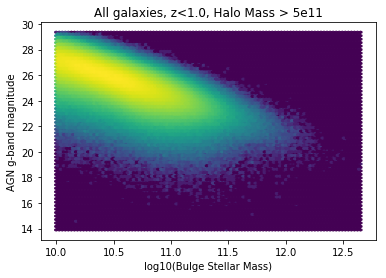

In [26]:
plt.hexbin(np.log10(bulgedata['stellar_mass_bulge'][aa]), agn['mag_g_lsst_agn'][bb], bins='log')
plt.xlabel('log10(Bulge Stellar Mass)')
plt.ylabel('AGN g-band magnitude')
plt.title('All galaxies, z<1.0, Halo Mass > 5e11')

In [27]:
g_tot_bulge = -2.5 * np.log10(10.**(bulgedata['mag_true_g_lsst'][aa]/-2.5) + 10.**(agn['mag_g_lsst_agn'][bb]/-2.5))
r_tot_bulge = -2.5 * np.log10(10.**(bulgedata['mag_true_r_lsst'][aa]/-2.5) + 10.**(agn['mag_r_lsst_agn'][bb]/-2.5))
i_tot_bulge = -2.5 * np.log10(10.**(bulgedata['mag_true_i_lsst'][aa]/-2.5) + 10.**(agn['mag_i_lsst_agn'][bb]/-2.5))

In [37]:
# what percentage of bulge mass > 10**10 have a 0.05 delta-mag in g?
use1, = np.where(bulgedata['stellar_mass_bulge'] > 1e10)
use2, = np.where((np.log10(bulgedata['stellar_mass_bulge'][aa]) > 10.0) &
                 ((bulgedata['mag_true_g_lsst'][aa] - g_tot_bulge) > 0.05))
print(use1.size)
print(use2.size)
print(float(use2.size) / float(use1.size))

4306971
3386790
0.7863507787723669


In [38]:
# what percentage of bulge mass > 10**10 have a 0.05 delta-mag in i?
use1, = np.where(bulgedata['stellar_mass_bulge'] > 1e10)
use2, = np.where((np.log10(bulgedata['stellar_mass_bulge'][aa]) > 10.0) &
                 ((bulgedata['mag_true_i_lsst'][aa] - i_tot_bulge) > 0.05))
print(use1.size)
print(use2.size)
print(float(use2.size) / float(use1.size))

4306971
1127942
0.2618875307031322


In [42]:
# And let's look at the fraction as a function of redshift ... very dumbly
redshifts = np.arange(0.0, 1.0, 0.1)
fractions = np.zeros(redshifts.size)
for i, r in enumerate(redshifts):
    use1, = np.where((bulgedata['stellar_mass_bulge'] > 1e10) &
                     (bulgedata['redshift'] > r) &
                     (bulgedata['redshift'] < (r + 0.1)))
    use2, = np.where((bulgedata['stellar_mass_bulge'][aa] > 1e10) &
                     (bulgedata['redshift'][aa] > r) &
                     (bulgedata['redshift'][aa] < (r + 0.1)) &
                     ((bulgedata['mag_true_g_lsst'][aa] - g_tot_bulge) > 0.05))
    fractions[i] = float(use2.size) / float(use1.size)
                     

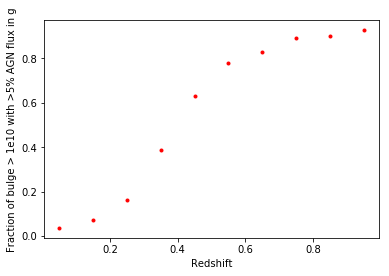

In [44]:
plt.plot(redshifts + 0.05, fractions, 'r.')
plt.xlabel('Redshift')
plt.ylabel('Fraction of bulge > 1e10 with >5% AGN flux in g')
plt.show()

In [45]:
# So let's load all galaxies at 1.0<z<1.5 brighter than i<24.0, and see what fraction have agn contamination
query = GCRCatalogs.GCRQuery('(mag_true_i_lsst < 24.0) & (redshift > 1.0) & (redshift < 1.5)')
bkgdata = truthcat.get_quantities(quantities_wanted, [query])
bkgdata = Table(bkgdata)

In [46]:
aaa, bbb = esutil.numpy_util.match(bkgdata['galaxy_id'], agn['galaxy_id'])

In [47]:
g_tot_bkg = -2.5 * np.log10(10.**(bkgdata['mag_true_g_lsst'][aaa]/-2.5) + 10.**(agn['mag_g_lsst_agn'][bbb]/-2.5))
r_tot_bkg = -2.5 * np.log10(10.**(bkgdata['mag_true_r_lsst'][aaa]/-2.5) + 10.**(agn['mag_r_lsst_agn'][bbb]/-2.5))
i_tot_bkg = -2.5 * np.log10(10.**(bkgdata['mag_true_i_lsst'][aaa]/-2.5) + 10.**(agn['mag_i_lsst_agn'][bbb]/-2.5))

In [49]:
# And let's look at the fraction as a function of redshift ... very dumbly
redshifts = np.arange(1.0, 1.5, 0.05)
fractions_g = np.zeros(redshifts.size)
fractions_i = np.zeros(redshifts.size)
for i, r in enumerate(redshifts):
    use1, = np.where((bkgdata['stellar_mass_bulge'] > 1e10) &
                     (bkgdata['redshift'] > r) &
                     (bkgdata['redshift'] < (r + 0.05)))
    use2, = np.where((bkgdata['stellar_mass_bulge'][aaa] > 1e10) &
                     (bkgdata['redshift'][aaa] > r) &
                     (bkgdata['redshift'][aaa] < (r + 0.05)) &
                     ((bkgdata['mag_true_g_lsst'][aaa] - g_tot_bkg) > 0.05))
    fractions_g[i] = float(use2.size) / float(use1.size)
    use2, = np.where((bkgdata['stellar_mass_bulge'][aaa] > 1e10) &
                     (bkgdata['redshift'][aaa] > r) &
                     (bkgdata['redshift'][aaa] < (r + 0.05)) &
                     ((bkgdata['mag_true_i_lsst'][aaa] - i_tot_bkg) > 0.05))
    fractions_i[i] = float(use2.size) / float(use1.size)

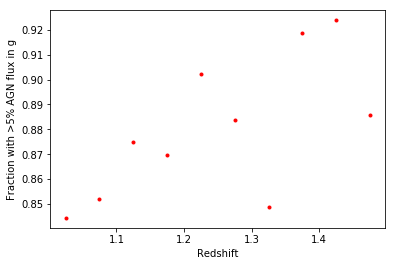

In [50]:
plt.plot(redshifts + 0.025, fractions_g, 'r.')
plt.xlabel('Redshift')
plt.ylabel('Fraction with >5% AGN flux in g')
plt.show()

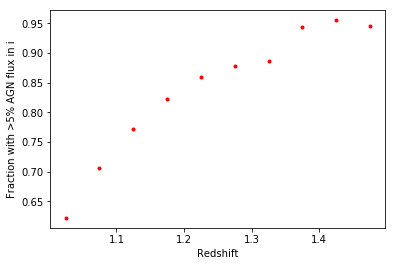

In [51]:
plt.plot(redshifts + 0.025, fractions_i, 'r.')
plt.xlabel('Redshift')
plt.ylabel('Fraction with >5% AGN flux in i')
plt.show()

In [52]:
redshifts = np.arange(1.0, 1.5, 0.05)
fractions_g = np.zeros(redshifts.size)
fractions_i = np.zeros(redshifts.size)
for i, r in enumerate(redshifts):
    use1, = np.where((bkgdata['stellar_mass_bulge'] > 1e10) &
                     (bkgdata['redshift'] > r) &
                     (bkgdata['redshift'] < (r + 0.05)))
    use2, = np.where((bkgdata['stellar_mass_bulge'][aaa] > 1e10) &
                     (bkgdata['redshift'][aaa] > r) &
                     (bkgdata['redshift'][aaa] < (r + 0.05)) &
                     ((bkgdata['mag_true_g_lsst'][aaa] - g_tot_bkg) > 0.2))
    fractions_g[i] = float(use2.size) / float(use1.size)
    use2, = np.where((bkgdata['stellar_mass_bulge'][aaa] > 1e10) &
                     (bkgdata['redshift'][aaa] > r) &
                     (bkgdata['redshift'][aaa] < (r + 0.05)) &
                     ((bkgdata['mag_true_i_lsst'][aaa] - i_tot_bkg) > 0.2))
    fractions_i[i] = float(use2.size) / float(use1.size)

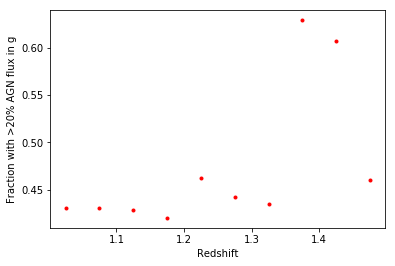

In [53]:
plt.plot(redshifts + 0.025, fractions_g, 'r.')
plt.xlabel('Redshift')
plt.ylabel('Fraction with >20% AGN flux in g')
plt.show()

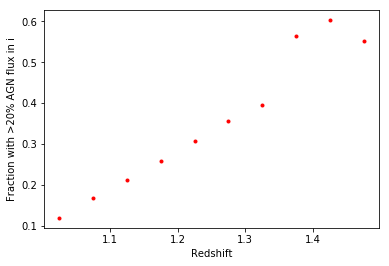

In [54]:
plt.plot(redshifts + 0.025, fractions_i, 'r.')
plt.xlabel('Redshift')
plt.ylabel('Fraction with >20% AGN flux in i')
plt.show()